1. Veriyi okuma ve bağımlı-bağımsız değişken belirleme

In [105]:
import pandas as pd

# Veri setini yükleme
file_path = "datasets/processed_thyroid_cancer_data.csv"
df = pd.read_csv(file_path)

# Veri setinin genel bilgilerini inceleyelim
print(df.info())

# İlk birkaç satırı görüntüleyelim
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age                  212691 non-null  int64  
 1   Gender               212691 non-null  int64  
 2   Country              212691 non-null  int64  
 3   Ethnicity            212691 non-null  int64  
 4   Family_History       212691 non-null  int64  
 5   Radiation_Exposure   212691 non-null  int64  
 6   Iodine_Deficiency    212691 non-null  int64  
 7   Smoking              212691 non-null  int64  
 8   Obesity              212691 non-null  int64  
 9   Diabetes             212691 non-null  int64  
 10  TSH_Level            212691 non-null  float64
 11  T3_Level             212691 non-null  float64
 12  T4_Level             212691 non-null  float64
 13  Nodule_Size          212691 non-null  float64
 14  Thyroid_Cancer_Risk  212691 non-null  int64  
dtypes: float64(4), in

In [106]:
from sklearn.model_selection import train_test_split

# Hedef değişken (bağımlı değişken)
target_column = "Thyroid_Cancer_Risk"

# Bağımsız değişkenler (X) ve bağımlı değişken (y) ayırma
X = df.drop(columns=[target_column])  # Bağımsız değişkenler
y = df[target_column]  # Bağımlı değişken (etiketler)

# Eğitim (%80) ve test (%20) olarak veriyi ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veri boyutlarını kontrol edelim
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((170152, 14), (42539, 14), (170152,), (42539,))

In [107]:
from imblearn.over_sampling import SMOTE

# SMOTE ile veri dengesini sağlama
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Yeni sınıf dağılımını kontrol edelim
unique_classes, class_counts = np.unique(y_train_balanced, return_counts=True)
print("Dengelenmiş Eğitim Verisindeki Sınıf Dağılımı:")
for cls, count in zip(unique_classes, class_counts):
    print(f"Sınıf {cls}: {count} örnek")

Dengelenmiş Eğitim Verisindeki Sınıf Dağılımı:
Sınıf 0: 86695 örnek
Sınıf 1: 86695 örnek
Sınıf 2: 86695 örnek


2. Eğitim ve Test verisini ayırma (%80 - %20)

3. Naif Bayes Modeli Eğitimi

In [108]:
from sklearn.naive_bayes import GaussianNB

# Naïve Bayes modelini oluştur
nb_model = GaussianNB()

# Modeli eğit
nb_model.fit(X_train, y_train)

# Test verisi üzerinde tahmin yap
y_pred = nb_model.predict(X_test)

# İlk 10 tahmini görüntüleyelim
print("İlk 10 Tahmin Sonucu:", y_pred[:10])

İlk 10 Tahmin Sonucu: [0 0 0 0 0 0 2 0 2 0]


4. Karmaşıklık Matrisi ve Ölçüm Metrikleri

Karmaşıklık Matrisi:
 [[19967     0  1726]
 [13280     0  1168]
 [ 3690     0  2708]]
Doğruluk (Accuracy): 0.5330
Duyarlılık (Recall): 0.5330
Kesinlik (Precision): 0.3484
F1 Skoru: 0.4152


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


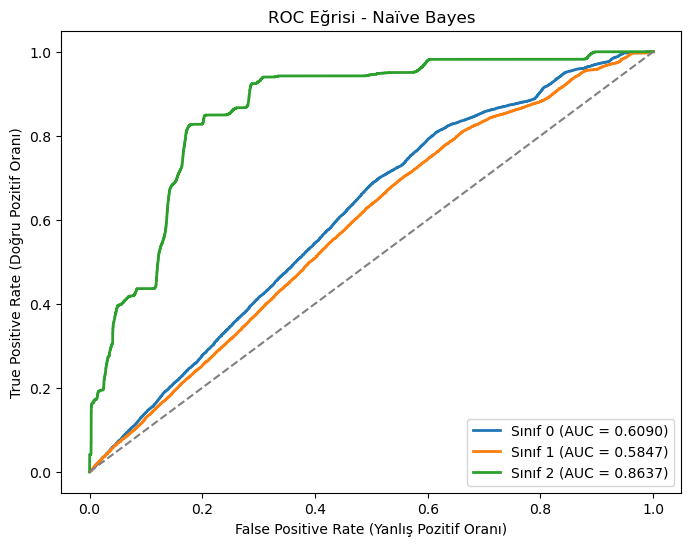

In [109]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# 1️⃣ Karmaşıklık Matrisi
conf_matrix = confusion_matrix(y_test, y_pred)
print("Karmaşıklık Matrisi:\n", conf_matrix)

# 2️⃣ Doğruluk (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Doğruluk (Accuracy): {accuracy:.4f}")

# 3️⃣ Duyarlılık (Recall/Sensitivity)
recall = recall_score(y_test, y_pred, average="weighted")  # Çok sınıflı olduğu için "weighted" kullanıyoruz
print(f"Duyarlılık (Recall): {recall:.4f}")

# 4️⃣ Kesinlik (Precision)
precision = precision_score(y_test, y_pred, average="weighted")
print(f"Kesinlik (Precision): {precision:.4f}")

# 5️⃣ F1 Skoru
f1 = f1_score(y_test, y_pred, average="weighted")
print(f"F1 Skoru: {f1:.4f}")

# 6️⃣ ROC Eğrisi ve AUC Skoru
y_prob = nb_model.predict_proba(X_test)  # Olasılık tahminlerini al
fpr = {}
tpr = {}
roc_auc = {}

# Her sınıf için ROC Eğrisi çizelim
plt.figure(figsize=(8, 6))
for i in np.unique(y_test):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, label=f"Sınıf {i} (AUC = {roc_auc[i]:.4f})")

# Rastgele tahmin eğrisini ekleyelim
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")

# ROC Eğrisi grafiğini göster
plt.xlabel("False Positive Rate (Yanlış Pozitif Oranı)")
plt.ylabel("True Positive Rate (Doğru Pozitif Oranı)")
plt.title("ROC Eğrisi - Naïve Bayes")
plt.legend(loc="lower right")
plt.show()

In [110]:
import numpy as np

# Sınıf dağılımını kontrol edelim
unique_classes, class_counts = np.unique(y_train, return_counts=True)
print("Eğitim Verisindeki Sınıf Dağılımı:")
for cls, count in zip(unique_classes, class_counts):
    print(f"Sınıf {cls}: {count} örnek")

Eğitim Verisindeki Sınıf Dağılımı:
Sınıf 0: 86695 örnek
Sınıf 1: 57952 örnek
Sınıf 2: 25505 örnek


In [111]:
from imblearn.over_sampling import SMOTE

# SMOTE ile sınıfları dengeleyelim
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Yeni sınıf dağılımını kontrol edelim
unique_classes, class_counts = np.unique(y_train_balanced, return_counts=True)
print("Dengelenmiş Eğitim Verisindeki Sınıf Dağılımı:")
for cls, count in zip(unique_classes, class_counts):
    print(f"Sınıf {cls}: {count} örnek")

Dengelenmiş Eğitim Verisindeki Sınıf Dağılımı:
Sınıf 0: 86695 örnek
Sınıf 1: 86695 örnek
Sınıf 2: 86695 örnek
